In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

import time
from numpy.random import default_rng

import healpy as hp
from healpy.newvisufunc import projview, newprojplot
import pandas as pd

import astropy.cosmology
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join

import sys
sys.path.insert(0,'../code')
%load_ext autoreload
%autoreload 2
import utils
import generate_random
import correlations
import masks
import maps
import animate

# Parameter setting

Plot formatting

In [4]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

# Perturbed magnitude catalogs

In [5]:
G_max = 20.5
tag_qspec = ''

In [6]:
tag_cat = ''
fn_gcat = f'../data/QUaia_G{G_max}{tag_qspec}{tag_cat}.fits'
tab_gcat = utils.load_table(fn_gcat)
print(len(tab_gcat))

1295502


In [7]:
tag_cat = '_mags0.05'
fn_gcatp = f'../data/QUaia_G{G_max}{tag_qspec}{tag_cat}.fits'
tab_gcatp = utils.load_table(fn_gcatp)
print(len(tab_gcatp))

1233390


In [8]:
tag_cat = '_mags-0.05'
fn_gcatm = f'../data/QUaia_G{G_max}{tag_qspec}{tag_cat}.fits'
tab_gcatm = utils.load_table(fn_gcatm)
print(len(tab_gcatm))

1353229


(13.0, 21.0)

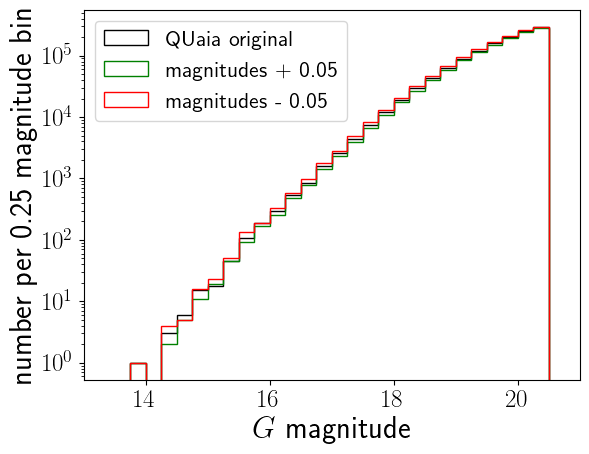

In [15]:
xlim = 13, 21
bin_width = 0.25
G_bins = np.arange(xlim[0], xlim[1]+bin_width, bin_width)

plt.hist(tab_gcat['phot_g_mean_mag'], label='QUaia original', 
         bins=G_bins, histtype='step', color='black')
plt.hist(tab_gcatp['phot_g_mean_mag'], label='magnitudes + 0.05',
        bins=G_bins, histtype='step', color='green')
plt.hist(tab_gcatm['phot_g_mean_mag'], label='magnitudes - 0.05',
        bins=G_bins, histtype='step', color='red')

plt.yscale('log')
plt.xlabel(r'$G$ magnitude')
plt.ylabel(f'number per {bin_width} magnitude bin')
plt.legend(fontsize=16)

plt.xlim(xlim)